# PyData.Tokyo Tutorial

* https://pydata.tokyo/ipynb/tutorial-1/dh.html


```
df[df.Embarked=='C']  # Embarked=='C'で絞り込み
df[df.Embarked=='C']['Survived']  # Embarked=='C'で絞り込んだdfのSurvived列を取得
df[(df.Embarked=='C') & (df.Sex=='male')]  # 複数の絞り込み条件
df.query("Embarked=='C' & Sex=='male'")  # df.queryを使うとすっきり書ける。ただし、変な列名(スペースがあったり/が入ってたりPython予約語と被っている）だと死ぬ
df[['PassengerId', 'Survived', 'Pclass']]  # 'PassengerId', 'Survived', 'Pclass'の列からなるdfを作成
```

## 1-1 データの読み込み

* https://www.kaggle.com/c/titanic から data.csv を落とす

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


以下のようなデータがある

* PassengerId: 乗客ID
* Survived: 1 = 生き残り 0 = 死亡
* Pclass: 等級
* Name: 名前
* Sex: 性別
* Age: 年齢
* Parch: 子供の数
* Ticket: チケット番号
* Fare: 運賃
* Cabin: 部屋番号
* Embarked: 乗船地

In [3]:
# 65歳の人のデータを抜き出す
df[df.Age == 65][['Name', 'Age']]

,Name,Age
54,"Ostby, Mr. Engelhart Cornelius",65.0
280,"Duane, Mr. Frank",65.0
456,"Millet, Mr. Francis Davis",65.0


## データを見てみよう

In [4]:
# データ件数
len(df)

891

In [5]:
# 先頭2件を確認
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
# 後ろ5件(デフォルト5件)を確認
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# 先頭3件の名前、年齢、性別のみ出力
df[['Name', 'Age', 'Sex']].head(3)

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,female


## 1-2. 集計


describe()関数を利用すると、データフレームの概要を把握することが出来ます。

* count: レコード数です。
* mean: 平均値です。
* std: 標準偏差です。
* min: 最小値です。
* 25%, 50%, 75%: 第1四分位, 中央値、第3四分位です。
* max: 最大値です。

In [8]:
# 計算可能なもの(数値)だけが対象
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
max_age = df['Age'].max()
print('年齢の最大値: {0}'.format(max_age))

mean_age = df['Age'].mean()
print('年齢の平均値: {0}'.format(mean_age))

年齢の最大値: 80.0
年齢の平均値: 29.69911764705882


In [10]:
# 女性で年齢の高い上位10名を確認する
df[df.Sex=='female'][['Name', 'Sex', 'Age']].sort_values('Age', ascending=0).head(10)

,Name,Sex,Age
483,"Turkula, Mrs. (Hedwig)",female,63.0
275,"Andrews, Miss. Kornelia Theodosia",female,63.0
829,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0
366,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0
268,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0
195,"Lurette, Miss. Elise",female,58.0
11,"Bonnell, Miss. Elizabeth",female,58.0
772,"Mack, Mrs. (Mary)",female,57.0
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0
15,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0


## 1-3. データの前処理

### 不要カラムの削除

In [11]:
# Cabin (部屋番号)などの値には多くの欠損データが含まれている
# 687件が欠損している
df['Cabin'].isnull().sum()

687

In [12]:
# Ticket（チケット番号）は、今回の分析では有用ではなさそう
df[['Name', 'Ticket']].head()

,Name,Ticket
0,"Braund, Mr. Owen Harris",A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,"Allen, Mr. William Henry",373450


In [13]:
# CabinとTicketのカラムを削除する
# 列指定で削除したいので axis=1 を指定する
df = df.drop(['Ticket', 'Cabin'], axis=1)

# df を上書きしているので、2回実行すると「TicketとCabinがないよー」って言われる

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### 欠損値の補間

In [15]:
# Age, Cabin などに欠損値(NaN)があることを確認
df.loc[4:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S


In [16]:
# interpolate() 関数で欠損値を補間する
# とはいえ、年齢で前後の間を埋めるのはよくない
df.loc[4:6][['Name', 'Age']].interpolate()

,Name,Age
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",44.5
6,"McCarthy, Mr. Timothy J",54.0


In [17]:
df.loc[4:6][['Name', 'Age']]

,Name,Age
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",NaN
6,"McCarthy, Mr. Timothy J",54.0


In [18]:
# 年齢の欠損値を、性別毎の年齢の平均値で補間する
female_age_mean = round(df[df.Sex=='female']['Age'].mean())
male_age_mean = round(df[df.Sex=='male']['Age'].mean())

print('女性の平均年齢は{0}歳、男性は{1}歳です。この平均年齢で補間します。'.format(female_age_mean, male_age_mean))

女性の平均年齢は28.0歳、男性は31.0歳です。この平均年齢で補間します。


In [19]:
# 女性で年齢が欠損している人の例
df[df.PassengerId==20][['PassengerId', 'Name', 'Sex', 'Age']]

,PassengerId,Name,Sex,Age
19,20,"Masselmani, Mrs. Fatima",female,NaN


In [20]:
# 男性で年齢が欠損している人の例
df[df.PassengerId==6][['PassengerId', 'Name', 'Sex', 'Age']]

,PassengerId,Name,Sex,Age
5,6,"Moran, Mr. James",male,NaN


In [21]:
# 年齢の欠損値を平均で埋める
dff = df[df.Sex=='female'].fillna({'Age': female_age_mean})
dfm = df[df.Sex=='male'].fillna({'Age': male_age_mean})

df2 = dff.append(dfm)

In [22]:
# 新しいデータフレームでは年齢の平均値が入っている
df2[df2.PassengerId==20][['PassengerId', 'Name', 'Sex', 'Age']]

,PassengerId,Name,Sex,Age
19,20,"Masselmani, Mrs. Fatima",female,28.0


In [23]:
df2[df2.PassengerId==6][['PassengerId', 'Name', 'Sex', 'Age']]

,PassengerId,Name,Sex,Age
5,6,"Moran, Mr. James",male,31.0


### カラムの追加

In [24]:
# 年齢で分類し、数値をふる
def classification_age(age):
    if age <= 19:
        return '1'
    elif age <= 34:
        return '2'
    elif age <= 49:
        return '3'
    elif age >= 50:
        return '4'    
    else:
        return '0'

# df.Age は df['Age] と同じ
df = df2
df['AgeClass'] = df.Age.map(classification_age)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeClass
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,1


## 1-4. データの可視化

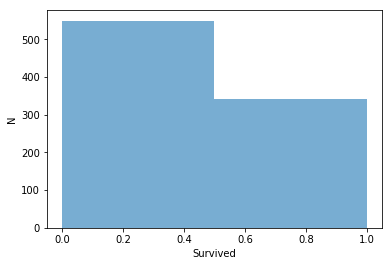

In [25]:
# 0 = 死亡, 1 = 生存という２つの軸でテータを見る
df['Survived'].plot(alpha=0.6, kind='hist', bins=2)
plt.xlabel('Survived')
plt.ylabel('N')

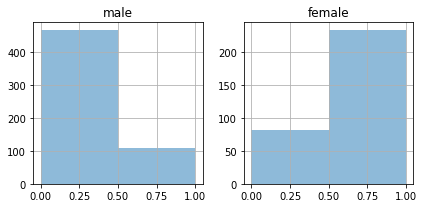

In [26]:
# 男性女性の死亡/生存をグラフにする
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

for i, sex in enumerate(['male', 'female']):
    df['Survived'][df.Sex==sex].hist(alpha=0.5, bins=2, ax=axes[i])
    axes[i].set_title(sex)

fig.subplots_adjust(hspace=0.3)
fig.tight_layout()

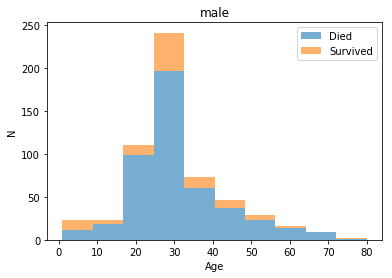

In [27]:
# 男性の年齢ごとの死亡/生存をグラフにする
plt.hist([df[(df.Survived==0) & (df.Sex=='male')]['Age'],
          df[(df.Survived==1) & (df.Sex=='male')]['Age']],
          alpha=0.6, range=(1,80), bins=10, stacked=True,
          label=('Died', 'Survived'))
plt.legend()
plt.xlabel('Age')
plt.ylabel('N')
plt.title('male')

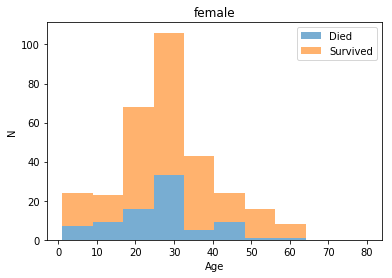

In [28]:
# 女性の年齢ごとの死亡/生存をグラフにする
plt.hist([df[(df.Survived==0) & (df.Sex=='female')]['Age'],
          df[(df.Survived==1) & (df.Sex=='female')]['Age']],
          alpha=0.6, range=(1,80), bins=10, stacked=True,
          label=('Died', 'Survived'))
plt.legend()
plt.xlabel('Age')
plt.ylabel('N')
plt.title('female')

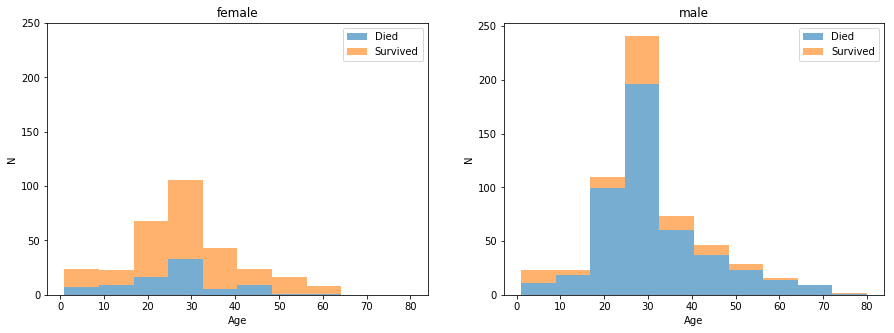

In [29]:
# 女性と男性のグラフをY軸を合わせて並べて描画
fig = plt.figure(figsize=[15, 5])

# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot
# 121 は nrows, ncols, plot_number
ax1 = fig.add_subplot(121)

plt.hist([df[(df.Survived==0) & (df.Sex=='female')]['Age'],
          df[(df.Survived==1) & (df.Sex=='female')]['Age']],
          alpha=0.6, range=(1,80), bins=10, stacked=True,
          label=('Died', 'Survived'))

plt.xlabel('Age')
plt.yticks([0, 50, 100, 150, 200, 250])
plt.ylabel('N')
plt.title('female')
plt.legend()

ax2 = fig.add_subplot(122)

plt.hist([df[(df.Survived==0) & (df.Sex=='male')]['Age'],
          df[(df.Survived==1) & (df.Sex=='male')]['Age']],
          alpha=0.6, range=(1,80), bins=10, stacked=True,
          label=('Died', 'Survived'))

plt.xlabel('Age')
plt.yticks([0, 50, 100, 150, 200, 250])
plt.ylabel('N')
plt.title('male')
plt.legend()

plt.show()

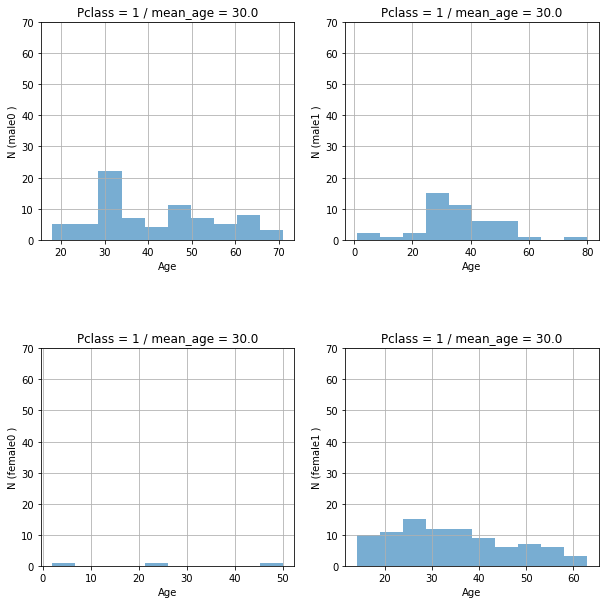

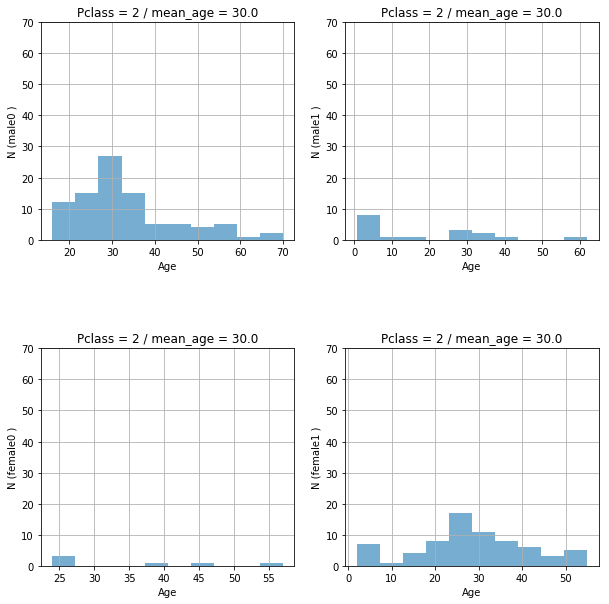

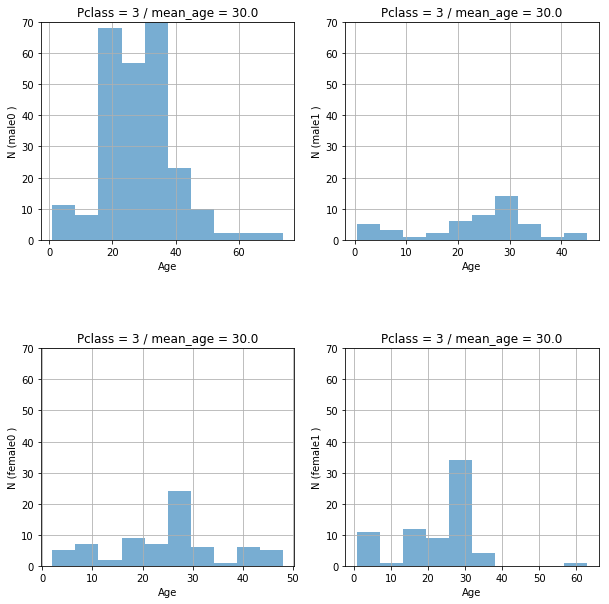

In [30]:
mean_age = df['Age'].mean()

for pclass in [1, 2, 3]:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[10, 10])

    sex_n=0
    for sex in ['male', 'female']:
        for survived in [0, 1]:
                fig = df[((df.Survived==survived) & (df.Sex==sex) & (df.Pclass==pclass) )].Age.hist(alpha=0.6, bins=10, ax=axes[sex_n][survived])
                fig.set_xlabel("Age")    
                fig.set_ylabel('N ('+sex+str(survived)+' )')  
                axes[sex_n][survived].set_ylim(0,70)
                fig.set_title('Pclass = {0} / mean_age = {1}'.format(pclass, round(mean_age)))
                
        sex_n += 1
    plt.subplots_adjust(hspace=0.5)
    plt.show()
